In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pysam
import seaborn as sns
from tqdm import tqdm
import os
import subprocess

## Helper Functions

In [9]:
def get_read_lengths(bam_file):
    lengths = []
    with pysam.AlignmentFile(bam_file, 'rb') as bam:
        for read in bam:
            lengths.append(read.query_length)
    return lengths

In [10]:
def plot_read_length_distribution(read_lengths):
    # Convert to numpy array
    read_lengths = np.array(read_lengths)
    
    # Filter out zeros
    read_lengths = read_lengths[read_lengths != 0]

    # Transform read lengths using the natural logarithm
    log_read_lengths = np.log10(read_lengths)

    plt.figure(figsize=(10, 6))
    sns.violinplot(x=log_read_lengths)
    plt.title('Log Read Length Distribution')
    plt.xlabel('Log Read Length')
    plt.grid(True)
    plt.show()

In [11]:
def plot_cpg_distribution(df, column='mod_qual', bins=30):
    """
    Plot a histogram of the CpG probabilities.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the CpG data.
    column (str): Name of the column containing the CpG probabilities.
    bins (int): Number of bins for the histogram.

    Returns:
    None
    """
    # Create a histogram of the CpG probabilities
    plt.hist(df[column], bins=bins, edgecolor='black')

    # Set the title and labels
    plt.title('CpG Probability Distribution')
    plt.xlabel('CpG Probability')
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [12]:
def filter_coverage(df, coverage_file):
    # Read the coverage file
    coverage_df = pd.read_csv(coverage_file, sep='\t')

    # Set 'chrom' and 'ref_position' as multi-index in both dataframes
    df = df.set_index(['chrom', 'ref_position'])
    coverage_df = coverage_df.set_index(['chrom', 'ref_position'])

    # Filter df where the index is in coverage_df's index
    df_filtered = df[df.index.isin(coverage_df.index)]

    # Reset the index
    df_filtered.reset_index(inplace=True)

    return df_filtered

In [13]:
def plot_cpg_coverage(df):
    # Calculate and print the maximum coverage
    max_coverage = df['cpg_coverage'].max()
    print(f"Maximum coverage: {max_coverage}")

    plt.figure(figsize=(10, 6))
    plt.hist(df['cpg_coverage'], bins=50, color='blue', edgecolor='black', log=True)
    plt.title('CpG Coverage Distribution')
    plt.xlabel('CpG Coverage')
    plt.ylabel('Frequency (log scale)')
    plt.show()

## BAM Exploration

In [14]:
# Replace 'your_bam_file.bam' with the path to your BAM file
bam_file = '/data/lvisser/modkit/outputs/bam/data_OHMX20230016R_20231114/no_haplotag/IMR14nov_R1.filtered.sorted.bam'

# Get read lengths from BAM file
read_lengths = get_read_lengths(bam_file)

print(len(read_lengths))

10892012


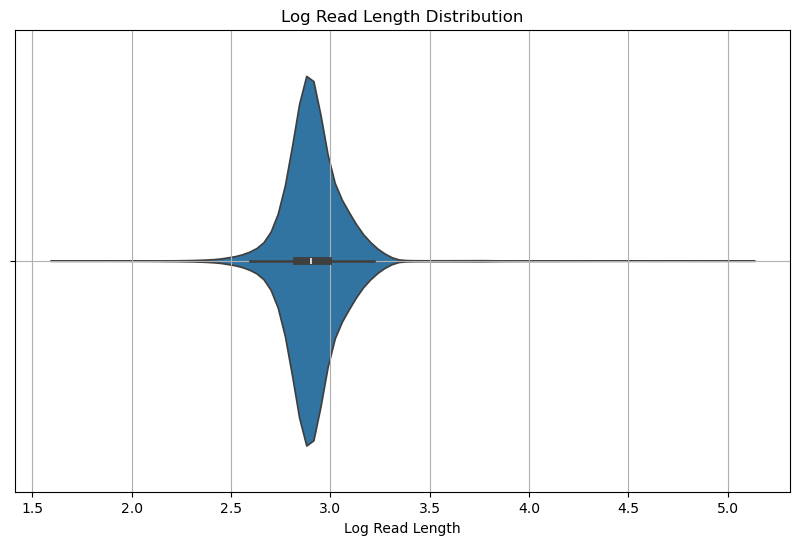

In [15]:
# Plot read length distribution
plot_read_length_distribution(read_lengths)

## Processing and Filtering

In [16]:
# python /data/lvisser/feature_matrices/processed_tables/process_files.py

In [17]:
# python /data/lvisser/feature_matrices/concatenated_tables/concat_files.py

## Neuroblastoma

### Unblocked + Blocked

In [ ]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1.csv"
cpg_cat_nb1 = pd.read_csv(file_path)
print(cpg_cat_nb1.shape)
cpg_cat_nb1.head()

(154510716, 6)


,source_directory,sample_id_adj,ref_position,chrom,cpg_coverage,mod_qual
0,data_OHMX20230016R_20231114,IMR14nov_R1,17000186,chr15,3,0.034831
1,data_OHMX20230016R_20231114,IMR14nov_R1,17000252,chr15,4,0.996582
2,data_OHMX20230016R_20231114,IMR14nov_R1,17000408,chr15,9,0.885525
3,data_OHMX20230016R_20231114,IMR14nov_R1,17000409,chr15,11,0.988370
4,data_OHMX20230016R_20231114,IMR14nov_R1,17000423,chr15,10,0.947266


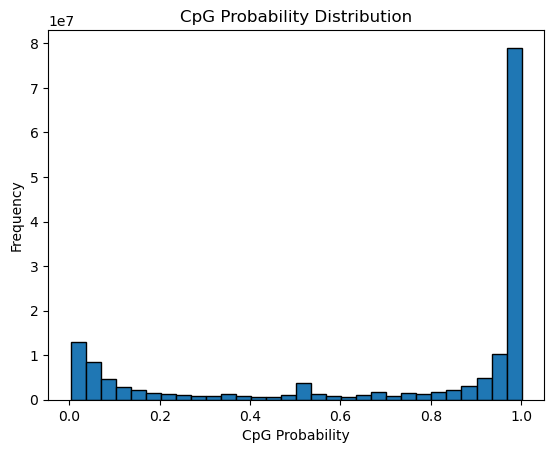

Maximum coverage: 7393


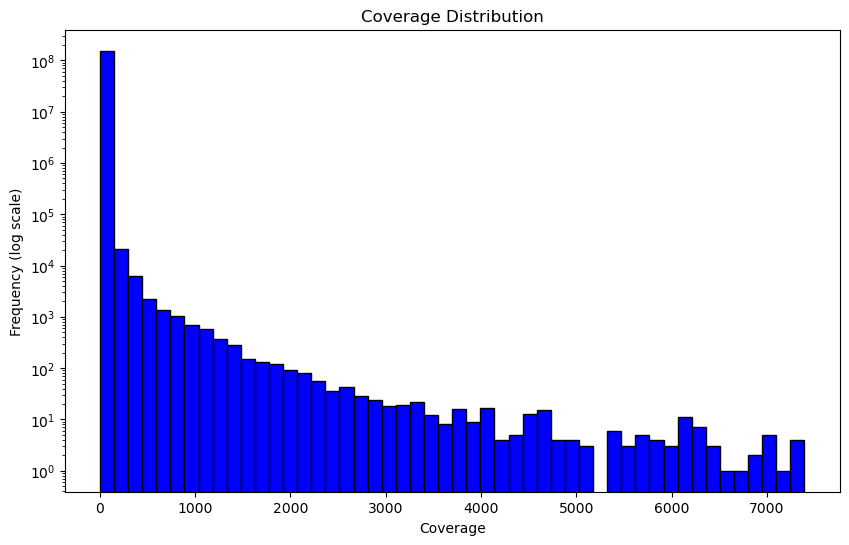

In [ ]:
plot_cpg_distribution(cpg_cat_nb1)
plot_cpg_coverage(cpg_cat_nb1)

In [ ]:
cpg_cat_nb1_scvg = filter_coverage(cpg_cat_nb1, "/data/lvisser/coverage/NB1_samples.unicvg_min5.txt")
cpg_cat_nb1_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_scvg.csv", index = False)
print(cpg_cat_nb1_scvg.shape)
cpg_cat_nb1_scvg.head()

(13637652, 6)


,chrom,ref_position,source_directory,sample_id_adj,cpg_coverage,mod_qual
0,chr15,17000408,data_OHMX20230016R_20231114,IMR14nov_R1,9,0.885525
1,chr15,17000409,data_OHMX20230016R_20231114,IMR14nov_R1,11,0.988370
2,chr15,17000423,data_OHMX20230016R_20231114,IMR14nov_R1,10,0.947266
3,chr15,17000424,data_OHMX20230016R_20231114,IMR14nov_R1,16,0.960938
4,chr15,17000530,data_OHMX20230016R_20231114,IMR14nov_R1,13,0.706355


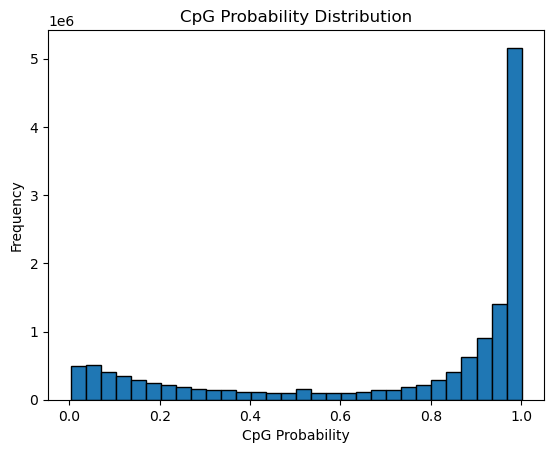

Maximum coverage: 7393


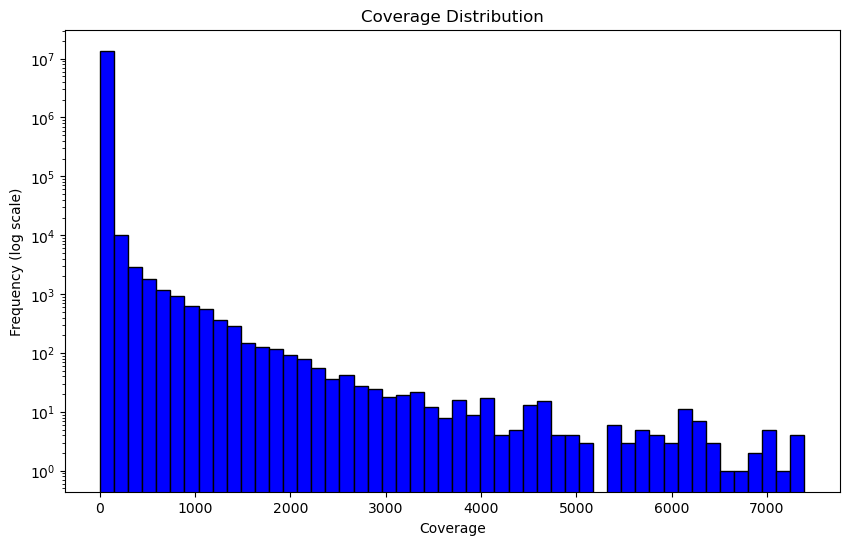

In [62]:
plot_cpg_distribution(cpg_cat_nb1_scvg)
plot_cpg_coverage(cpg_cat_nb1_scvg)

In [ ]:
# cpg_cat_nb1_unicvg = filter_unicoverage(cpg_cat_nb1, '/data/lvisser/coverage/NB1_samples.depth.txt')
# cpg_cat_nb1_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_20231114/cpg_cat_nb1_unicvg.csv", index = False)
# print(cpg_cat_nb1_unicvg.shape)
# cpg_cat_nb1_unicvg.head()

In [ ]:
# plot_cpg_distribution(cpg_cat_nb1_unicvg)
# plot_coverage(cpg_cat_nb1_unicvg)

## Multiple Myeloma

### Blocked + Unblocked

In [18]:
file_path = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1.csv"
cpg_cat_mm1 = pd.read_csv(file_path)
print(cpg_cat_mm1.shape)
cpg_cat_mm1.head()

(131106402, 6)


,source_directory,sample_id_adj,ref_position,chrom,cpg_coverage,mod_qual
0,data_OHMX20230016R_MM_2,MM1R_4_3,10118,chr16,2,0.983398
1,data_OHMX20230016R_MM_2,MM1R_4_3,10123,chr16,2,0.995117
2,data_OHMX20230016R_MM_2,MM1R_4_3,10157,chr16,1,0.827148
3,data_OHMX20230016R_MM_2,MM1R_4_3,10158,chr16,1,0.094727
4,data_OHMX20230016R_MM_2,MM1R_4_3,10178,chr16,2,0.562500


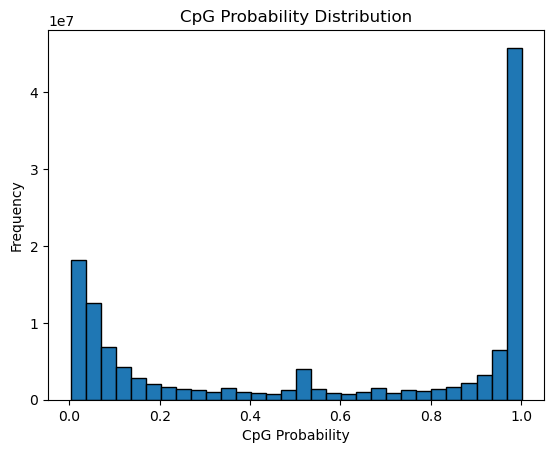

Maximum coverage: 10686


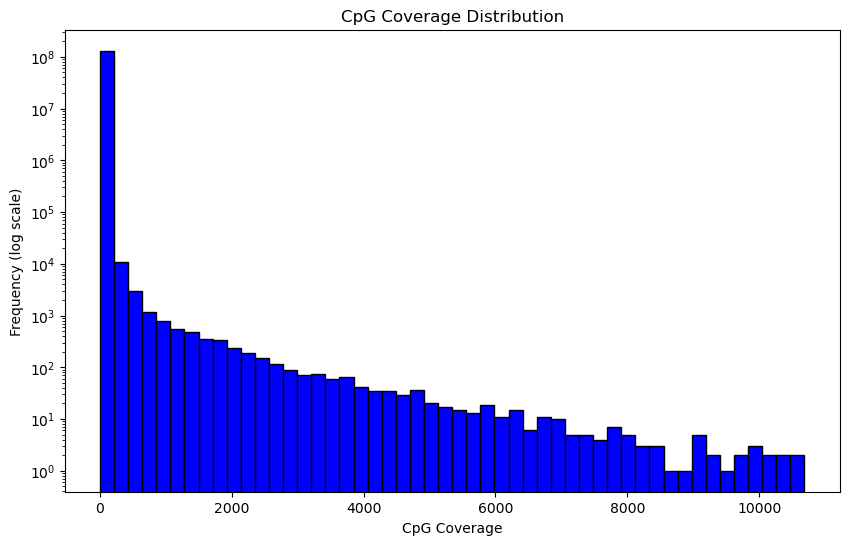

In [19]:
plot_cpg_distribution(cpg_cat_mm1)
plot_cpg_coverage(cpg_cat_mm1)

In [20]:
cpg_cat_mm1_scvg = filter_coverage(cpg_cat_mm1, "/data/lvisser/coverage/MM1_samples.unicvg_min5.txt")
cpg_cat_mm1_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_scvg.csv", index = False)
print(cpg_cat_mm1_scvg.shape)
cpg_cat_mm1_scvg.head()

(13580103, 6)


,chrom,ref_position,source_directory,sample_id_adj,cpg_coverage,mod_qual
0,chr16,52302,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.372070
1,chr16,52303,data_OHMX20230016R_MM_2,MM1R_4_3,2,0.821289
2,chr16,52318,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.943685
3,chr16,52319,data_OHMX20230016R_MM_2,MM1R_4_3,2,0.508789
4,chr16,52338,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.903971


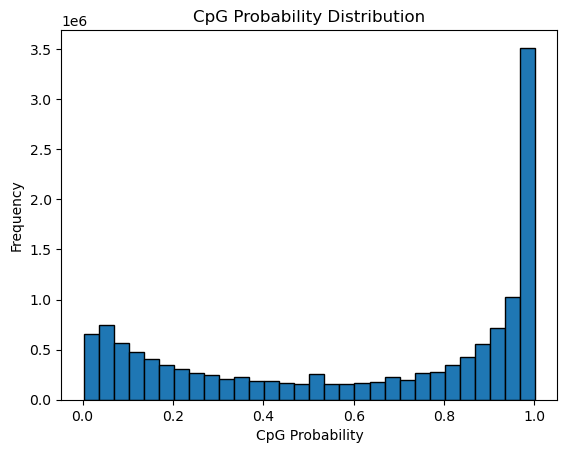

Maximum coverage: 10686


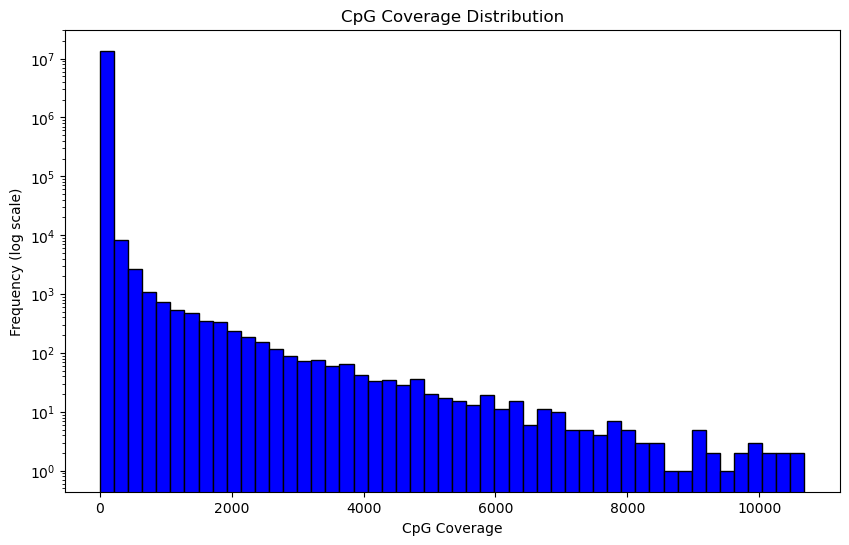

In [21]:
plot_cpg_distribution(cpg_cat_mm1_scvg)
plot_cpg_coverage(cpg_cat_mm1_scvg)

In [22]:
# cpg_cat_mm1_unicvg = filter_unicoverage(cpg_cat_mm1, min_unicoverage)
# cpg_cat_mm1_unicvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1_unicvg.csv", index = False)
# plot_cpg_distribution(cpg_cat_mm1_unicvg)
# plot_coverage(cpg_cat_mm1_unicvg)

## All Samples

In [ ]:
file_path_1 = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_mm1.csv"
file_path_2 = "/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_nb1.csv"
cpg_cat_mm1 = pd.read_csv(file_path_1)
cpg_cat_nb1 = pd.read_csv(file_path_2)
cpg_cat_all = pd.concat([cpg_cat_mm1, cpg_cat_nb1])
print(cpg_cat_all.shape)
cpg_cat_all.head()

(131106402, 6)


,source_directory,sample_id_adj,ref_position,chrom,cpg_coverage,mod_qual
0,data_OHMX20230016R_MM_2,MM1R_4_3,10118,chr16,2,0.983398
1,data_OHMX20230016R_MM_2,MM1R_4_3,10123,chr16,2,0.995117
2,data_OHMX20230016R_MM_2,MM1R_4_3,10157,chr16,1,0.827148
3,data_OHMX20230016R_MM_2,MM1R_4_3,10158,chr16,1,0.094727
4,data_OHMX20230016R_MM_2,MM1R_4_3,10178,chr16,2,0.562500


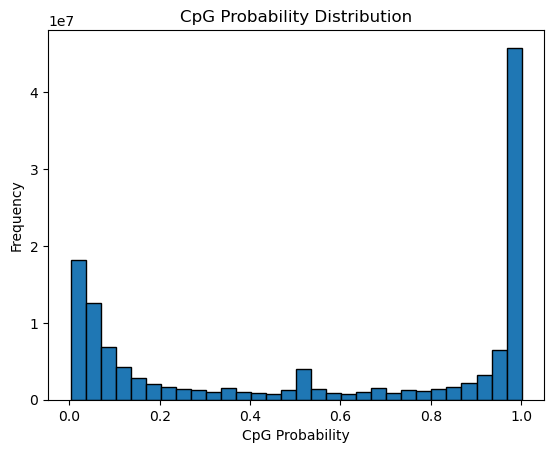

Maximum coverage: 10686


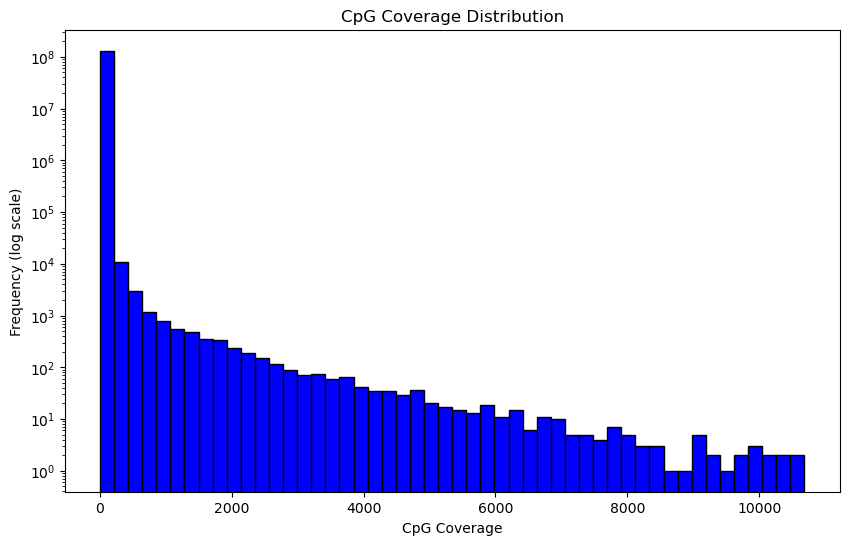

In [ ]:
plot_cpg_distribution(cpg_cat_all)
plot_cpg_coverage(cpg_cat_all)

In [ ]:
cpg_cat_all_scvg = filter_coverage(cpg_cat_all, "/data/lvisser/coverage/all_samples.unicvg_min5.txt")
cpg_cat_all_scvg.to_csv("/data/lvisser/feature_matrices/concatenated_tables/data_OHMX20230016R_MM_2/cpg_cat_all_scvg.csv", index = False)
print(cpg_cat_all_scvg.shape)
cpg_cat_all_scvg.head()

(13580103, 6)


,chrom,ref_position,source_directory,sample_id_adj,cpg_coverage,mod_qual
0,chr16,52302,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.372070
1,chr16,52303,data_OHMX20230016R_MM_2,MM1R_4_3,2,0.821289
2,chr16,52318,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.943685
3,chr16,52319,data_OHMX20230016R_MM_2,MM1R_4_3,2,0.508789
4,chr16,52338,data_OHMX20230016R_MM_2,MM1R_4_3,3,0.903971


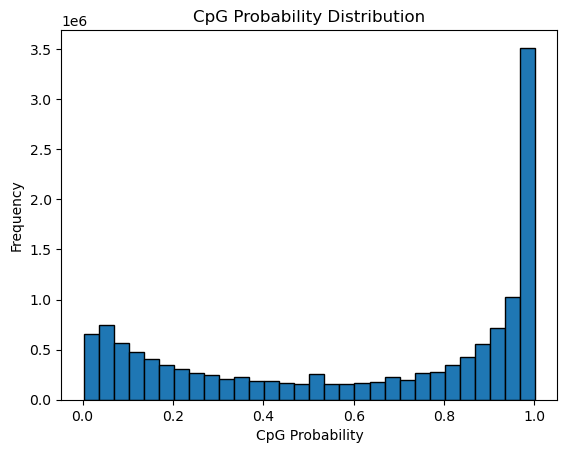

Maximum coverage: 10686


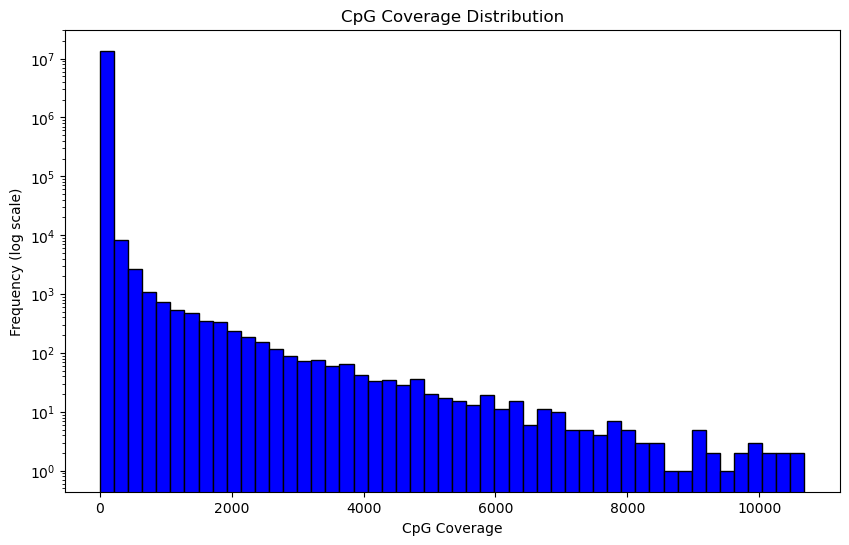

In [ ]:
plot_cpg_distribution(cpg_cat_all_scvg)
plot_cpg_coverage(cpg_cat_all_scvg)